In [1]:
import numpy as np
import scipy
import numpy 
import matplotlib.pyplot as plt
from scipy import linalg, special, stats
from numpy import genfromtxt
import ML_support as ml

In [2]:
class GaussianClassifier:
    def __init__(self):
        self.C = {}
        self.mu = {}

    def train(self, DTR, LTR):
        self.mu, self.C = ml.MU_Cov_calculator(DTR, LTR)

    def test(self, DTE, LTE):
        S = numpy.zeros((numpy.unique(LTE).size, DTE.shape[1]))
        predicted = []

        for i in numpy.unique(LTE):
            S[i, :] = ml.GAU_logpdf_ND(DTE, self.mu[i], self.C[i]) + numpy.log(1 / 2)

        Sp = scipy.special.logsumexp(S, axis=0)

        for x, p in zip(S.T, Sp): 
            tmp = x - p
            predicted.append(numpy.argmax(tmp))

        predicted = numpy.array(predicted)

        True_prediction = numpy.array([predicted == LTE])

        error = 1 - (numpy.count_nonzero(True_prediction) / True_prediction.size)

        print("Gaussian Classifier error:", error)


In [3]:
Data, label = ml.loadFile('../Train.txt')

In [4]:
(DTR, LTR), (DTE,LTE) = ml.split_db_2to1(Data, label, seed=42)

In [5]:
G=GaussianClassifier()
G.train(DTR,LTR)
G.test(DTE,LTE)

Gaussian Classifier error: 0.040644944575075614


In [6]:
Gn=GaussianClassifier()
Gn.train(ml.z_normalization(DTR), LTR)
Gn.test(DTE, LTE)
Gn.test(ml.z_normalization(DTE), LTE)

Gaussian Classifier error: 0.04165267047363119
Gaussian Classifier error: 0.04266039637218677


In [7]:
GG=GaussianClassifier()
GG.train(ml.gaussianize(DTR), LTR)
GG.test(DTE, LTE)
GG.test(ml.gaussianize(DTE), LTE)

Gaussian Classifier error: 0.0923748740342627
Gaussian Classifier error: 0.08296943231441045


In [5]:
class GaussianClassifier_mod1:
    def __init__(self):
        self.C = {}
        self.mu = {}

    def train(self, DTR, LTR):
        self.mu, self.C = ml.MU_Cov_calculator(DTR, LTR)

    def test(self, DTE, LTE, app, ROC=False):
        S = numpy.zeros((numpy.unique(LTE).size, DTE.shape[1]))
        ll = numpy.zeros((numpy.unique(LTE).size, DTE.shape[1]))
        predicted = []

        for i in numpy.unique(LTE):
            ll[i, :] = ml.GAU_logpdf_ND(DTE, self.mu[i], self.C[i])
        
        llr = numpy.array(ll[1, :]-ll[0, :])
        
        CM = ml.compute_optimal_B_decision(app, llr, LTE)
        
        app_bayes_risk=ml.compute_Bayes_risk(CM, app)
        DCF = ml.compute_norm_Bayes(app_bayes_risk, app)
        
        minDCF= ml.compute_min_DCF(llr, app, LTE)
        error = 1-(CM[0, 0]+CM[1,1])/(len(LTE))
        if(ROC == True):
            ml.plot_ROC(app, llr, LTE)
        
        print("\-/ \-/ \-/ \-/ \-/ ")
        print("Gaussian Classifier error:", error)
        print(app,"DCF:", DCF, "minDCF:", minDCF)
        print('CM\n', CM)
        print("/-\ /-\ /-\ /-\ /-\ ")

       

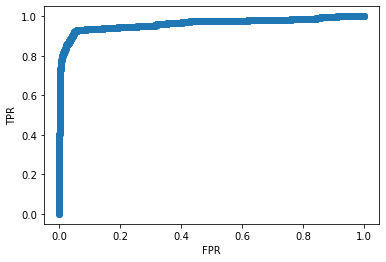

\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.040644944575075614
[0.5, 1, 1] DCF: 0.16563353744700895 minDCF: 0.1256510329049189
CM
 [[2618.   37.]
 [  84.  238.]]
/-\ /-\ /-\ /-\ /-\ 


In [6]:
G=GaussianClassifier_mod1()
G.train(DTR,LTR)
G.test(DTE,LTE, [1/2,1,1], True)

In [26]:
G.test(DTE,LTE, [1/3,1,1])

\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.03728585824655695
[0.3333333333333333, 1, 1] DCF: 0.1951120382208465 minDCF: 0.17622501850481126
CM [[2630.   39.]
 [  72.  236.]]
/-\ /-\ /-\ /-\ /-\ 


In [27]:
G.test(DTE,LTE, [0.1,1,1])

\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.03325495465233452
[0.1, 1, 1] DCF: 0.34258663616176577 minDCF: 0.28024628221519415
CM [[2645.   42.]
 [  57.  233.]]
/-\ /-\ /-\ /-\ /-\ 


In [28]:
G.test(DTE,LTE, [0.7,1,1])

\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.04165267047363119
[0.7, 1, 1] DCF: 0.3217935087365139 minDCF: 0.21857703608998943
CM [[2612.   34.]
 [  90.  241.]]
/-\ /-\ /-\ /-\ /-\ 


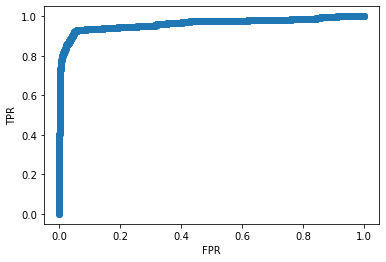

\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.048034934497816595
[0.5, 10, 1] DCF: 1.0247493439203283 minDCF: 0.6838570755669202
CM
 [[2586.   27.]
 [ 116.  248.]]
/-\ /-\ /-\ /-\ /-\ 


In [7]:
G.test(DTE,LTE, [1/2,10,1], True)


In [30]:
G.test(DTE,LTE, [0.6, 5, 1])


\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.045683574067853505
[0.6, 5, 1] DCF: 0.7767041248906533 minDCF: 0.5755467330596864
CM [[2593.   27.]
 [ 109.  248.]]
/-\ /-\ /-\ /-\ /-\ 


In [31]:
G.test(DTE,LTE, [1/2,5,1])

\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.04534766543500168
[0.5, 5, 1] DCF: 0.5843146490814884 minDCF: 0.4028194603324137
CM [[2597.   30.]
 [ 105.  245.]]
/-\ /-\ /-\ /-\ /-\ 


In [32]:
G.test(DTE,LTE, [1/2,8,1])


\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.04635539133355726
[0.5, 8, 1] DCF: 0.8265352264315995 minDCF: 0.610092187605141
CM [[2591.   27.]
 [ 111.  248.]]
/-\ /-\ /-\ /-\ /-\ 


In [33]:
G.test(DTE,LTE, [0.4,5,1])
G.test(DTE,LTE, [0.4,8,1])



\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.04366812227074235
[0.4, 5, 1] DCF: 0.43589933382679497 minDCF: 0.28766794518089855
CM [[2605.   33.]
 [  97.  242.]]
/-\ /-\ /-\ /-\ /-\ 
\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.045683574067853505
[0.4, 8, 1] DCF: 0.6210483816701433 minDCF: 0.42584976336271674
CM [[2596.   30.]
 [ 106.  245.]]
/-\ /-\ /-\ /-\ /-\ 


In [34]:
G.test(DTE,LTE, [0.1,1,1])
G.test(DTE,LTE, [0.9,1,1])


\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.03325495465233452
[0.1, 1, 1] DCF: 0.34258663616176577 minDCF: 0.28024628221519415
CM [[2645.   42.]
 [  57.  233.]]
/-\ /-\ /-\ /-\ /-\ 
\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.04702720859926102
[0.9, 1, 1] DCF: 0.9254572370634548 minDCF: 0.6584025301123747
CM [[2589.   27.]
 [ 113.  248.]]
/-\ /-\ /-\ /-\ /-\ 


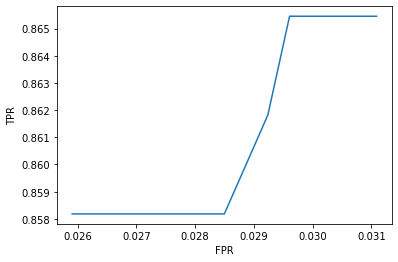

\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.04534766543500168
[0.5, 5, 1] DCF: 0.5843146490814884 minDCF: 0.4028194603324137
CM
 [[2597.   30.]
 [ 105.  245.]]
/-\ /-\ /-\ /-\ /-\ 


In [12]:
G.test(DTE,LTE, [0.5,5,1], True)


In [36]:
G.test(DTE,LTE, [0.2,1,5])


\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.0329190460194827
[0.2, 1, 5] DCF: 0.5559383621559787 minDCF: 0.32466994145750616
CM [[2649.   45.]
 [  53.  230.]]
/-\ /-\ /-\ /-\ /-\ 


In [37]:
G.test(DTE,LTE, [0.7,5,1])


\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.05005038629492775
[0.7, 5, 1] DCF: 1.148552138707579 minDCF: 0.7262813179911625
CM [[2579.   26.]
 [ 123.  249.]]
/-\ /-\ /-\ /-\ /-\ 


In [9]:
G.test(DTE,LTE, [0.9,10,1])


\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.09035942223715154
[0.9, 10, 1] DCF: 5.983803243388737 minDCF: 0.9130273871206513
CM
 [[2451.   18.]
 [ 251.  257.]]
/-\ /-\ /-\ /-\ /-\ 


In [10]:
G.test(DTE,LTE, [0.9,5,1])


\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.06953308700033589
[0.9, 5, 1] DCF: 3.1786689993943886 minDCF: 0.9130273871206513
CM
 [[2514.   19.]
 [ 188.  256.]]
/-\ /-\ /-\ /-\ /-\ 


In [11]:
G.test(DTE,LTE, [0.9,3,1])


\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.05844810211622442
[0.9, 3, 1] DCF: 2.020631182289214 minDCF: 0.9130273871206513
CM
 [[2548.   20.]
 [ 154.  255.]]
/-\ /-\ /-\ /-\ /-\ 


In [12]:
G.test(DTE,LTE, [0.8,5,1])


\-/ \-/ \-/ \-/ \-/ 
Gaussian Classifier error: 0.05374538125629824
[0.8, 5, 1] DCF: 1.651073279052554 minDCF: 0.9086064194872486
CM
 [[2564.   22.]
 [ 138.  253.]]
/-\ /-\ /-\ /-\ /-\ 
